 ______________________________________________
 
 #  Spotipy - Visual Analysis
***
 ______________________________________________
 
 ### Utilizing Spotify's API 'spotipy' this notebook will allow for visualization when analyzing artists and tracks  
 
 <br></br>
 <br></br>
 
 **Note:** Before working with this notebook you need to make sure these are true:
 
 - you have registered with Spotify as a developer
 - local conda enviorment has installed each of the required modules

<br></br>

Reference the <a href="https://spotipy.readthedocs.io/en/2.13.0/">spotipy docs</a>, provides a better understanding of the API



Reference <a href="https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-analysis/">Spotify developer</a>, provides a better understanding of the data stucture

In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.style as style 

import seaborn as sns

In [9]:
# Public key for the projects spotify developer app
client_id = '5572530ac0664df2b34373f3f41db89b' # May need to insert personal developer key

# Private key for the projects spotify developer app
client_secret = '15734ca0cac44e3c8ee4cc238bc895cf' # May need to insert personal developer key

# A set of strings describing playlist URIs. Playlists are public so no need to aquire authentication 
uri_playlists = ['spotify:playlist:5UYSypfSUpS7a9HOeAJkOf', # Viscostic playlist uri
                  'spotify:playlist:0gy40XWGZyTfkDj6QwB7Dy'] # Tripped playlist uri


In [10]:
client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [48]:
playlist_1 = pd.DataFrame(sp.playlist_items(uri_playlists[0]))['items']
playlist_2 = pd.DataFrame(sp.playlist_items(uri_playlists[1]))['items']

In [49]:
play_1 = []
play_2 = []
for song in playlist_1:
    play_1.append(song['track']['uri'])

for song in playlist_2:
    play_2.append(song['track']['uri'])

In [67]:
feat_1 = pd.DataFrame(sp.audio_features(play_1))
feat_2 = pd.DataFrame(sp.audio_features(play_2))

In [57]:
featured

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.615,0.698,6,-3.212,1,0.0485,0.081200,0.000001,0.1800,0.4370,80.024,audio_features,3wImXdE4bliIVSEl3lVue1,spotify:track:3wImXdE4bliIVSEl3lVue1,https://api.spotify.com/v1/tracks/3wImXdE4bliI...,https://api.spotify.com/v1/audio-analysis/3wIm...,180853,4
1,0.510,0.398,4,-8.750,0,0.0558,0.135000,0.000004,0.0634,0.3820,119.973,audio_features,01gNiOqg8u7vT90uVgOVmz,spotify:track:01gNiOqg8u7vT90uVgOVmz,https://api.spotify.com/v1/tracks/01gNiOqg8u7v...,https://api.spotify.com/v1/audio-analysis/01gN...,299160,4
2,0.865,0.529,1,-7.756,1,0.2300,0.769000,0.000007,0.1040,0.6490,111.982,audio_features,50phRe11Y2nC2N968jVU53,spotify:track:50phRe11Y2nC2N968jVU53,https://api.spotify.com/v1/tracks/50phRe11Y2nC...,https://api.spotify.com/v1/audio-analysis/50ph...,169827,4
3,0.679,0.750,6,-6.307,1,0.0314,0.056900,0.000005,0.1980,0.4990,130.021,audio_features,0BqCUAEfLNi02mhxzDkqRi,spotify:track:0BqCUAEfLNi02mhxzDkqRi,https://api.spotify.com/v1/tracks/0BqCUAEfLNi0...,https://api.spotify.com/v1/audio-analysis/0BqC...,194741,4
4,0.895,0.525,10,-7.969,0,0.1860,0.092500,0.005520,0.5850,0.2020,87.999,audio_features,6mUwMth1MQT8NVSMI7lKjx,spotify:track:6mUwMth1MQT8NVSMI7lKjx,https://api.spotify.com/v1/tracks/6mUwMth1MQT8...,https://api.spotify.com/v1/audio-analysis/6mUw...,193513,4
5,0.509,0.910,0,-4.514,1,0.3830,0.036100,0.000000,0.7620,0.5150,129.906,audio_features,5JivFvyCCaznVexlRLpZqK,spotify:track:5JivFvyCCaznVexlRLpZqK,https://api.spotify.com/v1/tracks/5JivFvyCCazn...,https://api.spotify.com/v1/audio-analysis/5Jiv...,203882,4
6,0.812,0.498,5,-5.951,0,0.2160,0.664000,0.000065,0.1560,0.7230,119.936,audio_features,45wselE9lcQ48i2GbAETWx,spotify:track:45wselE9lcQ48i2GbAETWx,https://api.spotify.com/v1/tracks/45wselE9lcQ4...,https://api.spotify.com/v1/audio-analysis/45ws...,193507,4
7,0.719,0.845,4,-6.212,0,0.0704,0.023500,0.081500,0.0794,0.3820,123.998,audio_features,2AAzsdPqRhRMU1Ykmp6gzA,spotify:track:2AAzsdPqRhRMU1Ykmp6gzA,https://api.spotify.com/v1/tracks/2AAzsdPqRhRM...,https://api.spotify.com/v1/audio-analysis/2AAz...,221627,4
8,0.710,0.458,10,-9.929,1,0.0874,0.231000,0.000195,0.1000,0.2620,113.950,audio_features,6ukLaivOPRHbA0xeOlme8W,spotify:track:6ukLaivOPRHbA0xeOlme8W,https://api.spotify.com/v1/tracks/6ukLaivOPRHb...,https://api.spotify.com/v1/audio-analysis/6ukL...,291450,4
9,0.737,0.921,1,-2.882,1,0.0786,0.153000,0.020100,0.1380,0.5500,109.971,audio_features,5gUBKp6E6BV3hz6IbIiAoD,spotify:track:5gUBKp6E6BV3hz6IbIiAoD,https://api.spotify.com/v1/tracks/5gUBKp6E6BV3...,https://api.spotify.com/v1/audio-analysis/5gUB...,194506,4


In [58]:
# The reference for this styling:
# https://medium.com/@andykashyap/top-5-tricks-to-make-plots-look-better-9f6e687c1e08
style.use('seaborn-poster')
style.use('ggplot')

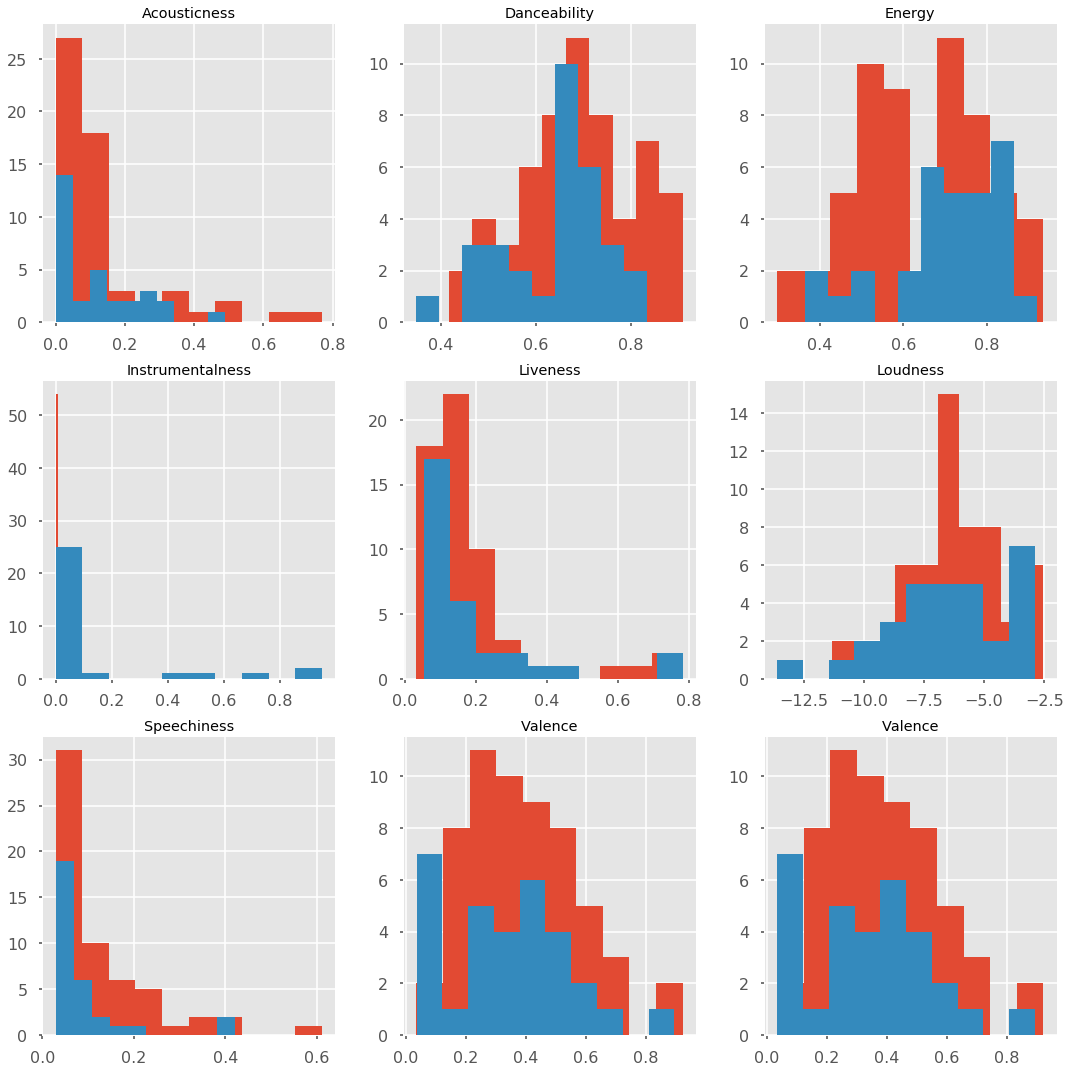

In [70]:
fig1, axs= plt.subplots(figsize=(15,15),nrows=3, ncols=3)
for featured in [feat_1, feat_2]:
    

    axs[0, 0].hist(featured['acousticness'])
    axs[0, 0].set_title("Acousticness")


    axs[0,1].hist(featured['danceability'])
    axs[0,1].set_title('Danceability')


    axs[0, 2].hist(featured['energy'])
    axs[0, 2].set_title('Energy')


    axs[1,0].hist(featured['instrumentalness'])
    axs[1,0].set_title('Instrumentalness')


    axs[1, 1].hist(featured['liveness'])
    axs[1, 1].set_title('Liveness')


    axs[1,2].hist(featured['loudness'])
    axs[1,2].set_title('Loudness')


    axs[2, 0].hist(featured['speechiness'])
    axs[2, 0].set_title('Speechiness')


    axs[2,1].hist(featured['valence'])
    axs[2,1].set_title('Valence')

    axs[2,2].hist(featured['valence'])
    axs[2,2].set_title('Valence')


plt.tight_layout()

/Users/Dom/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


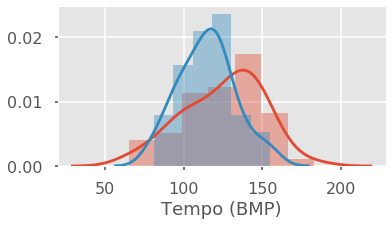

In [66]:
plt.figure(1, figsize=(20, 10),)

# hfont = {'fontname':'Proxima Nova'}

plt.subplot(331)
sns.distplot(featured['tempo']);
plt.xlabel('Tempo (BMP)', fontsize=18)
plt.grid(True)

plt.subplot(331)
sns.distplot(feat_2['tempo']);
plt.xlabel('Tempo (BMP)', fontsize=18)
plt.grid(True)